# Fannie Mae mortgage data

## Import cuxfilter

In [2]:
from cuxfilter import charts
import cuxfilter
from bokeh import palettes
from cuxfilter.layouts import *

In [3]:
#update data_dir if you have downloaded datasets elsewhere
DATA_DIR = './data'

## Download required datasets

In [4]:
from cuxfilter.sampledata import datasets_check
datasets_check('mortgage', base_dir=DATA_DIR)

Dataset - /home/ajay/data/146M_predictions_v2.arrow

dataset already downloaded


## Define charts

In [5]:
cux_df = cuxfilter.DataFrame.from_arrow(DATA_DIR+'/146M_predictions_v2.arrow')

In [14]:
chart0 = charts.choropleth(x='zip', y='delinquency_12_prediction', color_column='delinquency_12_prediction', color_aggregate_fn='mean', geo_color_palette=palettes.Purples9,
                                  geoJSONSource = 'https://raw.githubusercontent.com/rapidsai/cuxfilter/GTC-2018-mortgage-visualization/javascript/demos/GTC%20demo/src/data/zip3-ms-rhs-lessprops.json',
                                  data_points=1000)

chart2 = charts.bar('delinquency_12_prediction',data_points=50)
chart3 = charts.range_slider('borrower_credit_score',data_points=50)


### Add mappings for chart1

In [15]:
mapper1 = {}

for val in cux_df.data.dti.unique().to_pandas().tolist():
    mapper1[int(val)] = 'l_'+str(val)

chart1 = charts.panel_widgets.drop_down('dti', label_map=mapper1)
#also available: panel_widgets.multi_select

## Create a dashboard object

In [16]:
d = cux_df.dashboard([chart0, chart1], layout=feature_and_base, theme=cuxfilter.themes.dark, title="Ajay's Dashboard")

In [17]:
#add more charts
d.add_charts([chart2, chart3])

In [18]:
#dashboard object
d

#### cuxfilter DashBoard
    
    [title] Markdown(str)
    [chart1] Column(sizing_mode='scale_both', width=1600)
    [0] Bokeh(PolygonDeckGL)
    [chart2] Column(sizing_mode='scale_both', width=1600)
    [0] Bokeh(Figure)
    [1] RangeSlider(end=0.8056737, sizing_mode='scale_width', start=0.15787923, step=0.012955889701843262, value=(0.15787923, 0.8056737), width=1600)
    [widgets] Column
    [0] Column(css_classes=['non-handle-temp'], sizing_mode='scale_both')
        [0] FloatSlider(bar_color='#8735fb', end=146594623, name='Data Points selected', sizing_mode='scale_both', start=0, value=146594623, width=280)
    [1] Column(sizing_mode='scale_both', width=400)
        [0] Select(css_classes=['custom-dropdown'], height=50, name='dti', options={'l_1.0': 1, 'l_2.0': 2, ...}, sizing_mode='scale_both', width=280)
    [2] Column(sizing_mode='scale_both', width=400)
        [0] RangeSlider(end=850.0, name='borrower_credit_score', sizing_mode='scale_both', start=330.0, step=1, value=(330.0, 850.0), width=280)

## Starting the dashboard

1. d.show('current_notebook_url:current_notebook_port') remote dashboard

2. d.app('current_notebook_url:current_notebook_port') inline in notebook (layout is ignored, and charts are displayed one below another)

Incase you need to stop the server:

- d.stop()

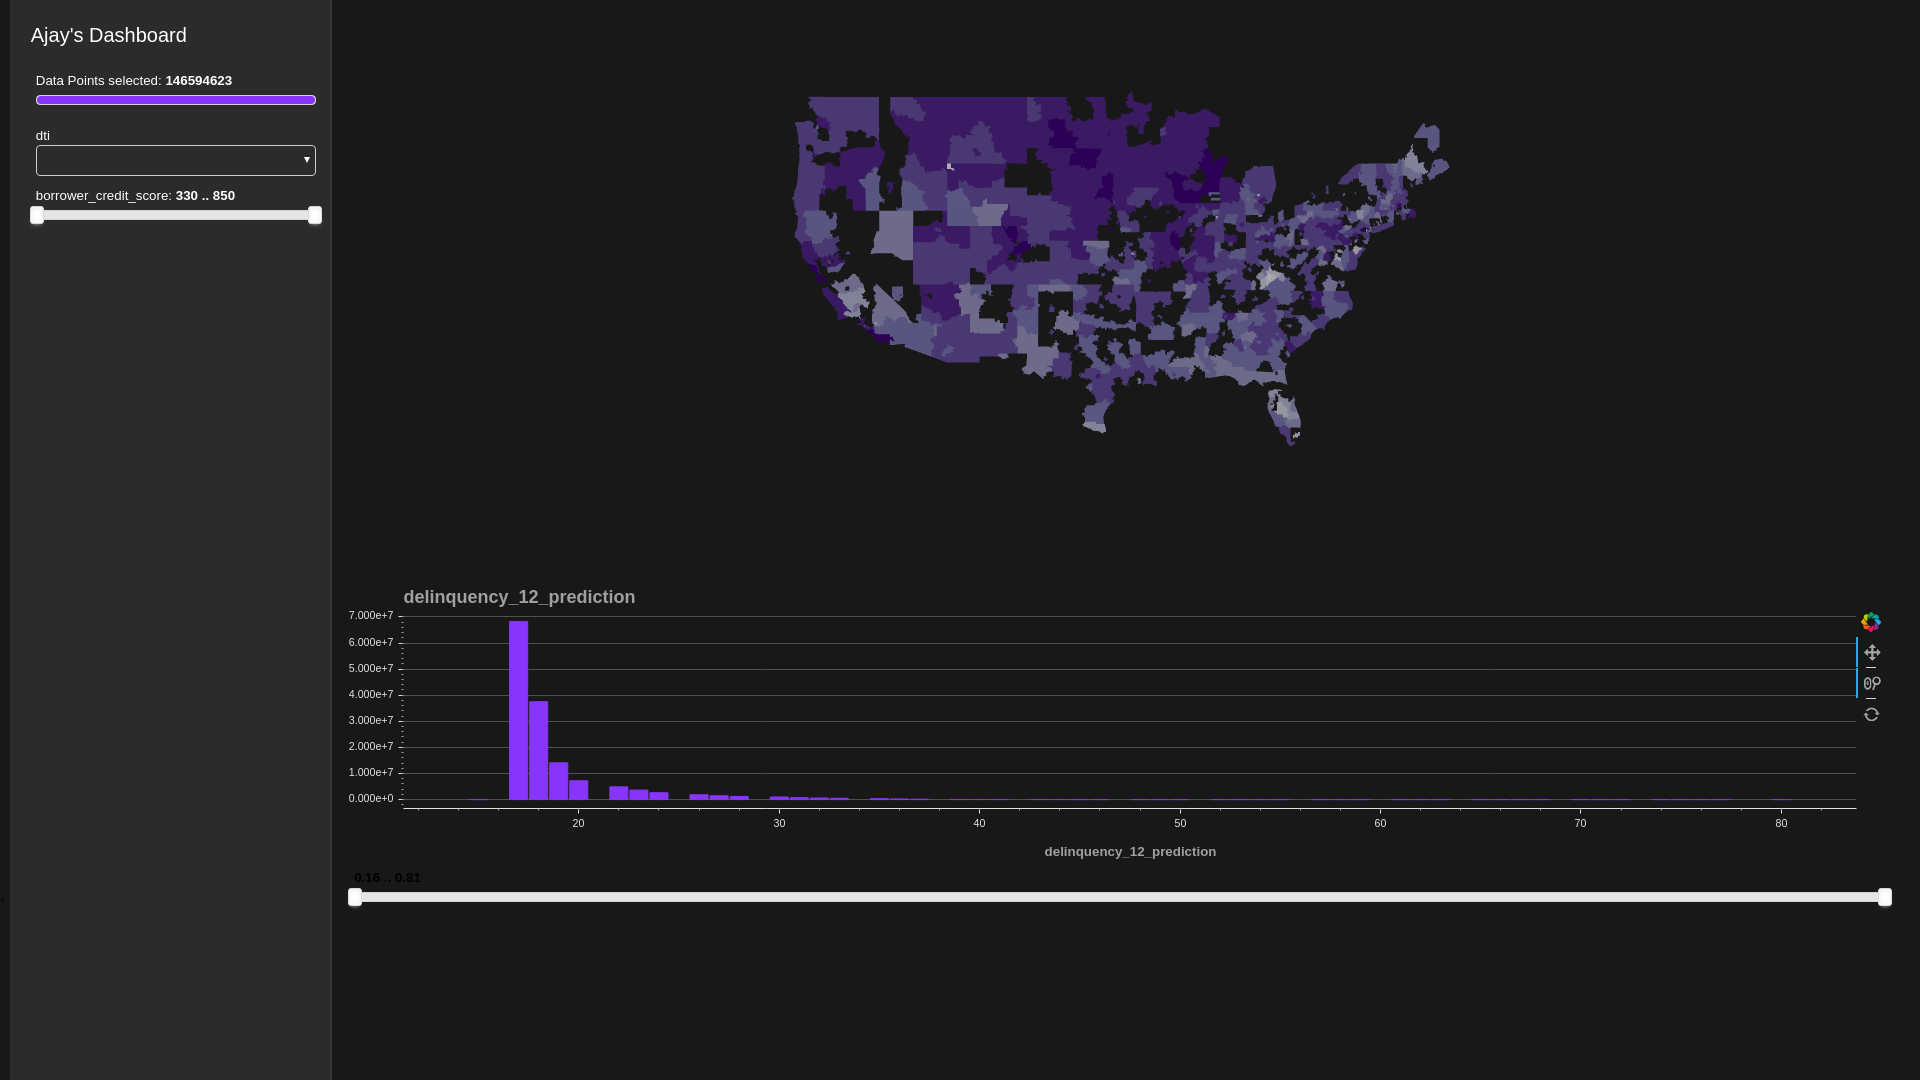

In [20]:
# preview the dashboard
await d.preview()

## Export the queried data into a dataframe

In [11]:
queried_df = d.export()

no querying done, returning original dataframe
